### Word2Vec
- võimaldab automaatselt hinnata sõnade semantilist sarnasust
- KOLM mudelit:
    - 1. mudel: vektorid treenitud etTenTeni lemmade (?) pealt, kasutades CBOW (= järjestikuste sõnade esinemissageduse) mudelit
    - 2. ja 3. mudel: vektorid treenitud Koondkorpuse peal, samuti CBOW. Sellel mudelid nii lemmade kui ka tekstisõnade pealt.

In [28]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# teekonnad mudeliteni
ettenten_fpath = 'cbow_300_5_10_20/ettenten.txt.word_vectors'
kk_fpath_words = 'words.cbow.s200.w2v.bin'
kk_fpath_lemmas = 'lemmas.cbow.s200.w2v.bin'

In [10]:
# loeme mudelid sisse
et_wv_model = KeyedVectors.load_word2vec_format(ettenten_fpath, binary=False, unicode_errors="ignore")
kk_wv_word_model = KeyedVectors.load_word2vec_format(kk_fpath_words, binary=True)
kk_wv_lemma_model = KeyedVectors.load_word2vec_format(kk_fpath_lemmas, binary=True)

In [8]:
# sõnavara hulk
len(et_wv_model.vocab)

470688

In [9]:
len(kk_wv_word_model.vocab)

816757

In [10]:
len(kk_wv_lemma_model.vocab)

441391

In [29]:
# vaatame, mis seal etteten sõnavaras sees on..
et_words = [word for word in et_wv_model.vocab if word.startswith('kasuta')]
len(et_words)

193

In [32]:
print(et_words[:100])

['kasutama', 'kasutamine', 'kasutaja', 'kasutatav', 'kasutav', 'kasutajanimi', 'kasutajaliides', 'kasutamata', 'kasutajakonto', 'kasutajasõbralik', 'kasutatavus', 'kasutajatunnus', 'kasutatud', 'kasutatav_materjal', 'kasuta', 'kasutajaskond', 'kasutamisvõimalus', 'kasutatu', 'kasutajasõbralikum', 'kasutajatugi', 'kasutajasõbralikkus', 'kasutaja_sisselogimine', 'kasutaks', 'kasutatav_ravim', 'kasutatav_tehnoloogia', 'kasutada', 'kasutamata_võimalus', 'kasutamiskõlbmatu', 'kasutajakogemus', 'kasutamistingimus', 'kasutajamugavus', 'kasutamisõigus', 'kasutamiskõlblik', 'kasutamismugavus', 'kasutajaõigus', 'kasutatav_tarkvara', 'kasutajagrupp', 'kasutajaprofiil', 'kasutamisjuhend', 'kasutanu', 'kasutajatingimus', 'kasutamata_puhkus', 'kasutatama', 'kasutaja_johu', 'kasutamine_sihtotstarve', 'kasutama_sihtotstarbeliselt', 'kasutatav_kemikaal', 'kasutamisoskus', 'kasutamisviis', 'kasutamata_ressurss', 'kasutatav_termin', 'kasutajakeskkond', 'kasutamata_potentsiaal', 'kasutama_tuumkütus', 'kas

In [30]:
kk_words = [word for word in kk_wv_word_model.vocab if word.startswith('kasuta')]
len(kk_words)

360

In [31]:
print(kk_words[:100])

['kasutada', 'kasutatakse', 'kasutatud', 'kasutamise', 'kasutamine', 'kasutab', 'kasutades', 'kasutavad', 'kasutama', 'kasutamist', 'kasutanud', 'kasutas', 'kasutamiseks', 'kasutati', 'kasutaja', 'kasuta', 'kasutamata', 'kasutan', 'kasutasid', 'kasutamisel', 'kasutatav', 'kasutatavad', 'kasutatavate', 'kasutatava', 'kasutajate', 'kasutamisest', 'kasutajad', 'kasutata', 'kasutamisega', 'kasutame', 'kasutasin', 'kasutajaid', 'kasutad', 'kasutamisele', 'kasutajatele', 'kasutajale', 'kasutamises', 'kasutaks', 'kasutatavaid', 'kasutajat', 'kasutatavat', 'kasutage', 'kasutataks', 'kasutajal', 'kasutasime', 'kasutav', 'kasutate', 'kasutavate', 'kasutajatel', 'kasutatavast', 'kasutava', 'kasutatavale', 'kasutaksid', 'kasutajanime', 'kasutatavatest', 'kasutajaks', 'kasutajatest', 'kasutatavaks', 'kasutamast', 'kasutamiskõlbmatuks', 'kasutajanimi', 'kasutatavatele', 'kasutaksin', 'kasutajaga', 'kasutajaliidese', 'kasutavat', 'kasutajaliides', 'kasutatavas', 'kasutasite', 'kasutavaid', 'kasutatun

In [ ]:
# erinevus: ettenteni mudelil on fraasituvastamist tehtud!

In [49]:
# sõnasarnasuste hindamine
et_wv_model.similarity('kana', 'inimene')

0.22829127

In [68]:
et_wv_model.similarity('pang', 'ämber')

0.4189607

In [51]:
et_wv_model.most_similar('kasutamine', topn=30)

[('kasutatav', 0.6668009757995605),
 ('kasutama', 0.6551482677459717),
 ('kasutuselevõtt', 0.6245251297950745),
 ('kasutuselevõtmine', 0.6187608242034912),
 ('mittekasutamine', 0.6043885350227356),
 ('kasutus_võtmine', 0.5903804898262024),
 ('sihipärane_kasutamine', 0.5875000357627869),
 ('eesmärgipärane_kasutamine', 0.5832699537277222),
 ('rakendamine', 0.5730588436126709),
 ('tarvitamine', 0.5705316662788391),
 ('kasutav', 0.5686150193214417),
 ('kasutamisvõimalus', 0.5672471523284912),
 ('laialdasem_kasutamine', 0.563083291053772),
 ('väärkasutamine', 0.5488554239273071),
 ('ümberkäimine', 0.5481576323509216),
 ('kasutus', 0.5472619533538818),
 ('kasutmine', 0.5470644235610962),
 ('kasutus_võtt', 0.5442874431610107),
 ('väärkasutus', 0.5409002304077148),
 ('korduvkasutamine', 0.5379757285118103),
 ('kasutusala', 0.5239372253417969),
 ('käsitsemine', 0.520728349685669),
 ('võrgukasutus', 0.5176475048065186),
 ('laialdasem_kasutuselevõtt', 0.5112104415893555),
 ('kooskasutamine', 0.51

In [66]:
kk_wv_lemma_model.most_similar('kasutamine', topn=30)

[('kasutatav', 0.6511647701263428),
 ('mittekasutamine', 0.6309105157852173),
 ('kasutuselevõtt', 0.6079427003860474),
 ('kasutamisvõimalus', 0.6026104688644409),
 ('väärkasutamine', 0.5995277762413025),
 ('kasutuselevõtmine', 0.5913410782814026),
 ('kasutama', 0.5845884680747986),
 ('rakendamine', 0.565234899520874),
 ('kasutav', 0.5576927065849304),
 ('tarvitamine', 0.5549322962760925),
 ('olemasolu', 0.54996657371521),
 ('ümberkäimine', 0.5474495887756348),
 ('kasutatavus', 0.5470473170280457),
 ('paigutamine', 0.5367960929870605),
 ('kulutamine', 0.5353953242301941),
 ('kasutusala', 0.5333975553512573),
 ('kasutama|kasutatud', 0.5292937755584717),
 ('käitamine', 0.5281800031661987),
 ('ärakasutamine', 0.5271234512329102),
 ('lisamine', 0.5268858075141907),
 ('kasutusvaldkond', 0.5245541930198669),
 ('kasutusvõimalus', 0.524120032787323),
 ('juurdepääs', 0.5240358114242554),
 ('energiakasutus', 0.5234930515289307),
 ('ülekandmine', 0.5228903293609619),
 ('käsitsemine', 0.52191996574

In [67]:
kk_wv_word_model.most_similar('kasutamine', topn=30)

[('kasutuselevõtmine', 0.7521828413009644),
 ('kasutus', 0.7467569708824158),
 ('kasutuselevõtt', 0.7322674989700317),
 ('tarvitamine', 0.7068675756454468),
 ('kasutamisel', 0.7000571489334106),
 ('rakendamine', 0.6849321126937866),
 ('kasutamisega', 0.6831435561180115),
 ('omamine', 0.6767147779464722),
 ('ärakasutamine', 0.6626251339912415),
 ('kasutamist', 0.6497491598129272),
 ('vahetamine', 0.6432769894599915),
 ('lisamine', 0.6367030143737793),
 ('pruukimine', 0.6305789947509766),
 ('eksponeerimine', 0.6281709671020508),
 ('juurutamine', 0.6243036985397339),
 ('legaliseerimine', 0.6240840554237366),
 ('kasutamisele', 0.6218405961990356),
 ('sisseostmine', 0.6213221549987793),
 ('ostmine', 0.6167696714401245),
 ('levitamine', 0.6127527356147766),
 ('kasutamises', 0.6115915775299072),
 ('paigutamine', 0.6096482276916504),
 ('kasutamisest', 0.6056287288665771),
 ('asendamine', 0.6052825450897217),
 ('omandamine', 0.6039632558822632),
 ('müümine', 0.6031509637832642),
 ('funktsioneer

In [52]:
# ettenteni lemmamudel
et_wv_model.most_similar(positive=['kuningas', 'naine'], negative=['mees'])

[('kuninganna', 0.6915972828865051),
 ('neustria', 0.6064232587814331),
 ('monarh', 0.605919361114502),
 ('georg_vi', 0.6047451496124268),
 ('õukondlane', 0.5909985303878784),
 ('valitseja', 0.5864306688308716),
 ('kuningriik', 0.5862295627593994),
 ('ahasveros', 0.5846462249755859),
 ('prantsuse_kuningas', 0.5840556621551514),
 ('keiser', 0.577674388885498)]

In [63]:
# koondkorpuse sõnamudel
kk_wv_word_model.most_similar(positive=['kuningas', 'naine'], negative=['mees'])

[('kuninganna', 0.7526842355728149),
 ('prints', 0.6713693141937256),
 ('keiser', 0.6695409417152405),
 ('printsess', 0.6337474584579468),
 ('kroonprints', 0.633395791053772),
 ('kuninga', 0.6261935234069824),
 ('hertsog', 0.6127020120620728),
 ('keisrinna', 0.5938602089881897),
 ('paavst', 0.5885353088378906),
 ('vaarao', 0.5842868089675903)]

In [64]:
# koondkorpuse lemmamudel
kk_wv_lemma_model.most_similar(positive=['kuningas', 'naine'], negative=['mees'])

[('kuninganna', 0.7486084699630737),
 ('printsess', 0.6709170341491699),
 ('prints', 0.6419978141784668),
 ('monarh', 0.6318715214729309),
 ('kroonprints', 0.6304517388343811),
 ('margrethe', 0.6288236379623413),
 ('keiser', 0.6228755712509155),
 ('keisrinna', 0.6196092963218689),
 ('troonipärija', 0.612930417060852),
 ('adulyadej', 0.5929155349731445)]

In [7]:
kk_wv_lemma_model.most_similar(positive=['pariis', 'venemaa'], negative=['prantsusmaa'])

[('moskva', 0.8396175503730774),
 ('peterburi', 0.658314049243927),
 ('bakuu', 0.6091529130935669),
 ('kiiev', 0.5994855165481567),
 ('sankt-peterburg', 0.5756168961524963),
 ('varssavi', 0.5741285085678101),
 ('minsk', 0.5689444541931152),
 ('kaliningrad', 0.5686715841293335),
 ('kiievi', 0.5630719661712646),
 ('ufaa', 0.5617833733558655)]

In [8]:
kk_wv_word_model.most_similar(positive=['pariis', 'venemaa'], negative=['prantsusmaa'])

[('berliin', 0.6079870462417603),
 ('moskva', 0.5923038721084595),
 ('lääs', 0.5821133852005005),
 ('peking', 0.5672074556350708),
 ('patriarhaat', 0.5474997758865356),
 ('kiiev', 0.5373822450637817),
 ('oblast', 0.5256807804107666),
 ('jerevan', 0.5238484740257263),
 ('kaliningrad', 0.5221109390258789),
 ('kreml', 0.5114347338676453)]

In [9]:
et_wv_model.most_similar(positive=['pariis', 'venemaa'], negative=['prantsusmaa'])

[('moskva', 0.7766798138618469),
 ('peterburi', 0.6320218443870544),
 ('kiiev', 0.6074367761611938),
 ('jaroslavl', 0.564623236656189),
 ('piiter', 0.5631083250045776),
 ('minsk', 0.5577200055122375),
 ('kreml', 0.5530152320861816),
 ('jekaterinburg', 0.5461690425872803),
 ('leningrad', 0.5410454273223877),
 ('sankt_peterburg', 0.5402530431747437)]

In [10]:
# ettenteni lemmamudel
et_wv_model.most_similar(positive=['tüdruk', 'mees'], negative=['laps'])

[('neiu', 0.7440087795257568),
 ('noormees', 0.7324340343475342),
 ('kutt', 0.7301409244537354),
 ('neid', 0.7003124356269836),
 ('poiss', 0.6729291677474976),
 ('naisterahvas', 0.6627707481384277),
 ('naine', 0.6508357524871826),
 ('tütarlaps', 0.6429299116134644),
 ('meesterahvas', 0.635061502456665),
 ('neidis', 0.6287803649902344)]

In [19]:
et_wv_model.most_similar(positive=['rikas', 'elu'], negative=['naine'])

[('elujärg', 0.4528283476829529),
 ('jõukas', 0.44964390993118286),
 ('rikkus', 0.44439178705215454),
 ('eluke', 0.4431745409965515),
 ('rikkam', 0.4406708776950836),
 ('superrikas', 0.43002235889434814),
 ('vaene', 0.42103642225265503),
 ('elujärg_parandamine', 0.4194713532924652),
 ('vaesem', 0.41471433639526367),
 ('ülirikas', 0.40944600105285645)]

In [62]:
# ettenteni lemmamudel
w1 = ['voodi', 'padi']
w2 = ['diivan']
et_wv_model.most_similar (positive=w1,negative=w2,topn=10)

[('madrats', 0.6100513935089111),
 ('peaalune', 0.5442579388618469),
 ('soe_tekk', 0.5137917995452881),
 ('madratsikate', 0.4981898069381714),
 ('võrevoodi', 0.49663516879081726),
 ('tekk', 0.4942913353443146),
 ('voodi_tekk', 0.491998553276062),
 ('magama', 0.4887303113937378),
 ('pehme_padi', 0.4878075122833252),
 ('vatitekk', 0.4829617142677307)]

In [71]:
# visualiseerimine t-SNE (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) abil

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline


def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.vocab:
        # teeme lihtsustatud tingimuse: sõna peab lõppema us-prefiksiga ja olema lühem kui 8 tähemärki
        if word.endswith('us') and len(word)<8:
            tokens.append(model[word])
            labels.append(word)
    
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

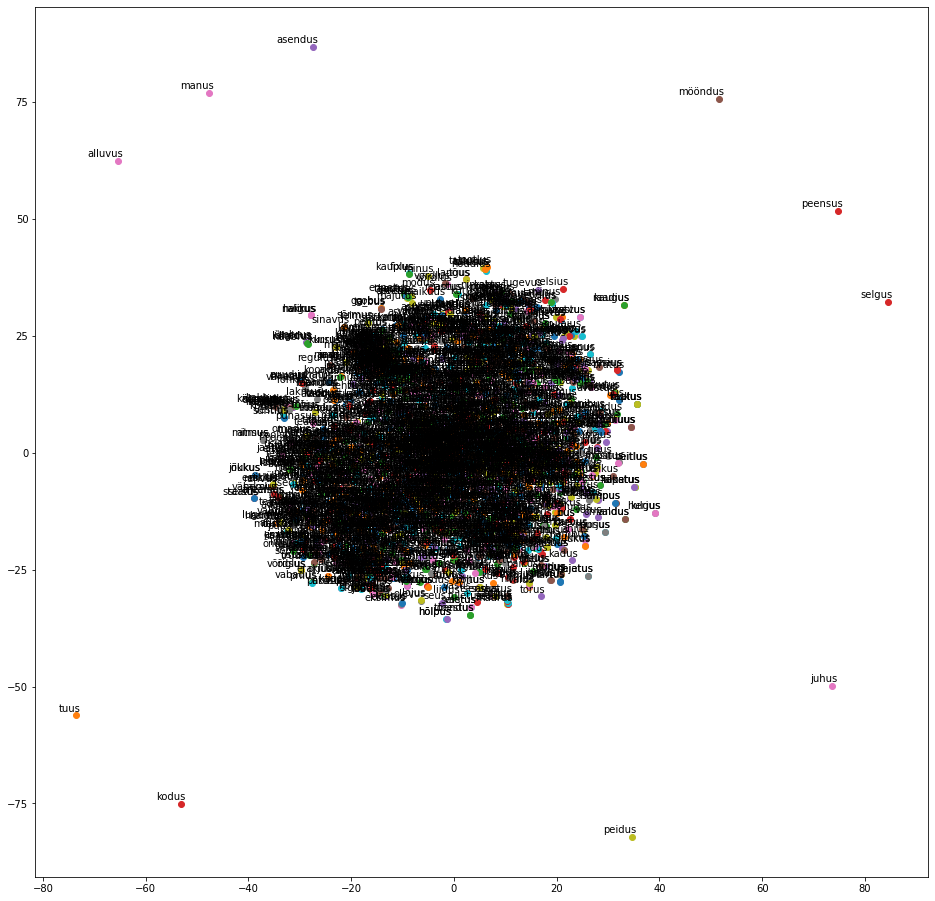

In [72]:
# visualiseerimine ettenteni mudeli peal
tsne_plot(et_wv_model)

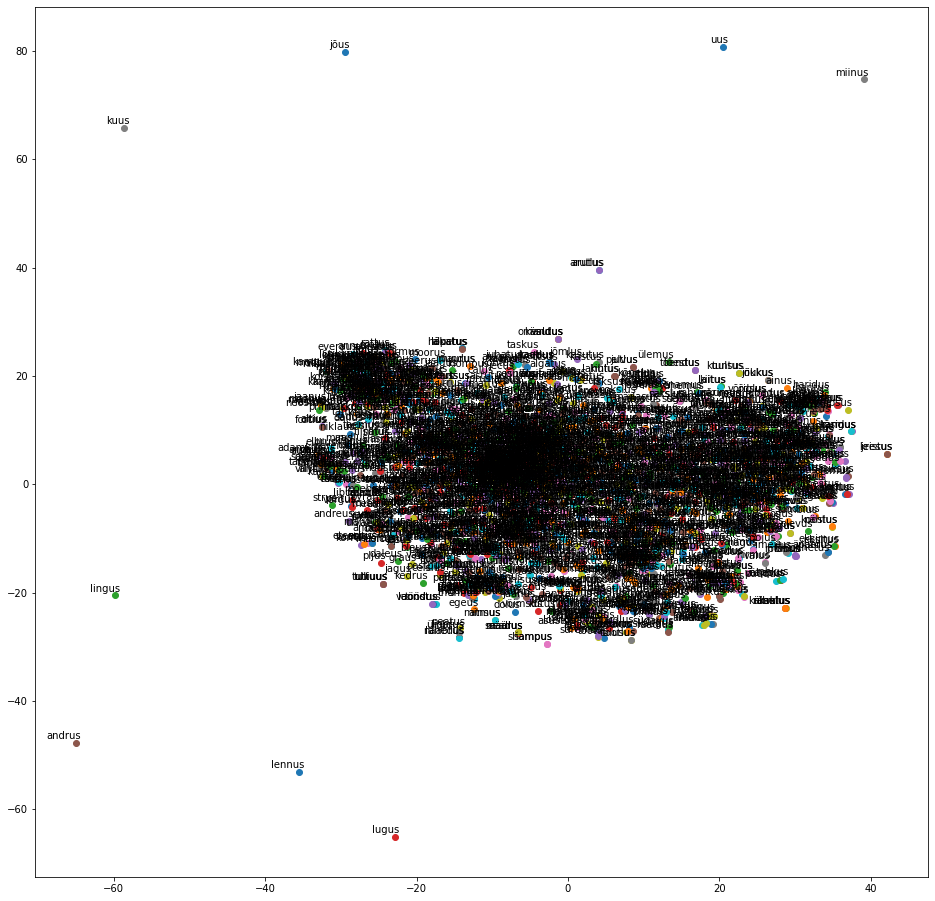

In [73]:
# visualiseerimine koondkorpuse lemmamudeli peal
tsne_plot(kk_wv_lemma_model)

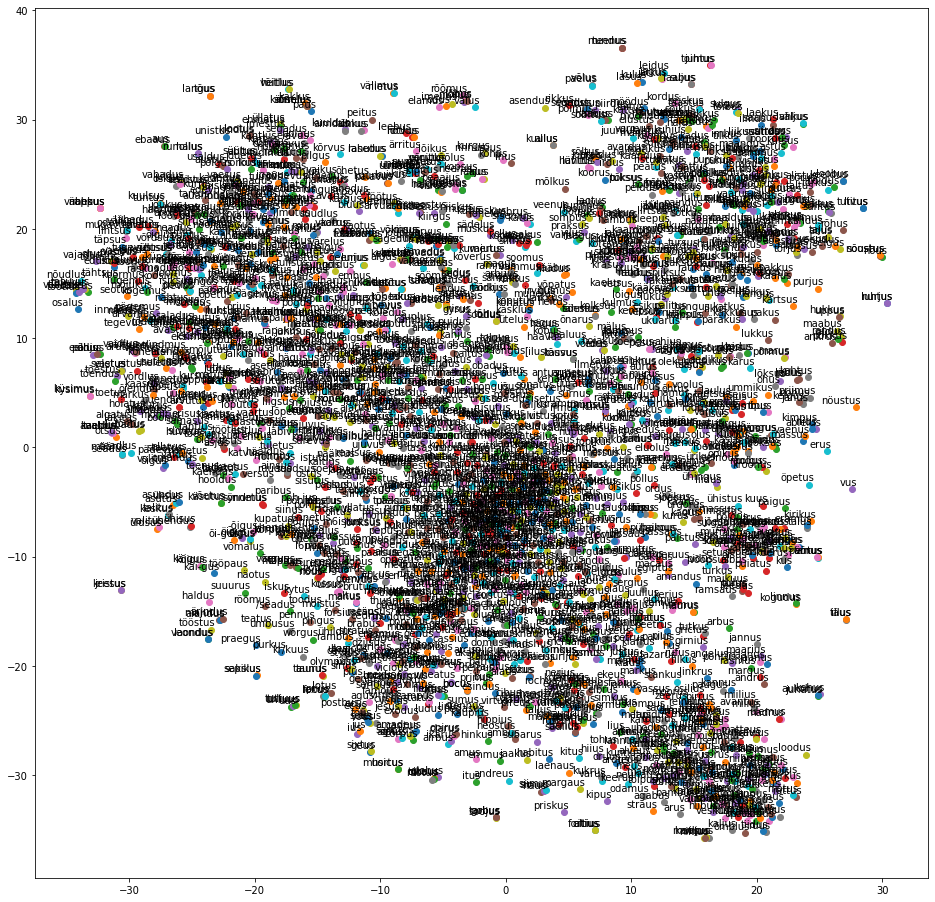

In [75]:
# visualiseerimine koondkorpuse sõnamudeli peal
tsne_plot(kk_wv_word_model)

In [25]:
# parandame tingimust POS märgendite abil
import stanza
nlp = stanza.Pipeline('et')

2020-07-10 17:17:38 INFO: Loading these models for language: et (Estonian):
| Processor | Package |
-----------------------
| tokenize  | edt     |
| pos       | edt     |
| lemma     | edt     |
| depparse  | edt     |

2020-07-10 17:17:38 INFO: Use device: cpu
2020-07-10 17:17:38 INFO: Loading: tokenize
2020-07-10 17:17:39 INFO: Loading: pos
2020-07-10 17:17:40 INFO: Loading: lemma
2020-07-10 17:17:40 INFO: Loading: depparse
2020-07-10 17:17:42 INFO: Done loading processors!


In [77]:
doc = nlp('tere sõber, kuidas elad?')
print(*[f'sõna: {word.text}\tanalüüs: {word.upos}' for sent in doc.sentences for word in sent.words], sep='\n')

sõna: tere	analüüs: INTJ
sõna: sõber	analüüs: NOUN
sõna: ,	analüüs: PUNCT
sõna: kuidas	analüüs: ADV
sõna: elad	analüüs: VERB
sõna: ?	analüüs: PUNCT


In [22]:
# Stanza kasutamine, tagastab sõnaliigi (w.upos)
def analyysi(word):
    doc = nlp(word)
    words = (w.upos for sent in doc.sentences for w in sent.words)
    return next(words)

In [173]:
def get_words(model):
    labels = []
    tokens = []

    for word in model.vocab:
        if word.endswith('mine'):
            analyzed = analyysi(word)
            if analyzed == 'NOUN' and word.startswith('k') and len(word) < 11:
                tokens.append(model[word])
                labels.append(word)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    return tsne_model.fit_transform(tokens), labels

In [31]:
def plot(fitted_values, labels):

    x = []
    y = []
    for value in fitted_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [165]:
# ettenteni mudeli peal
all_values, all_labels = get_words(et_wv_model)

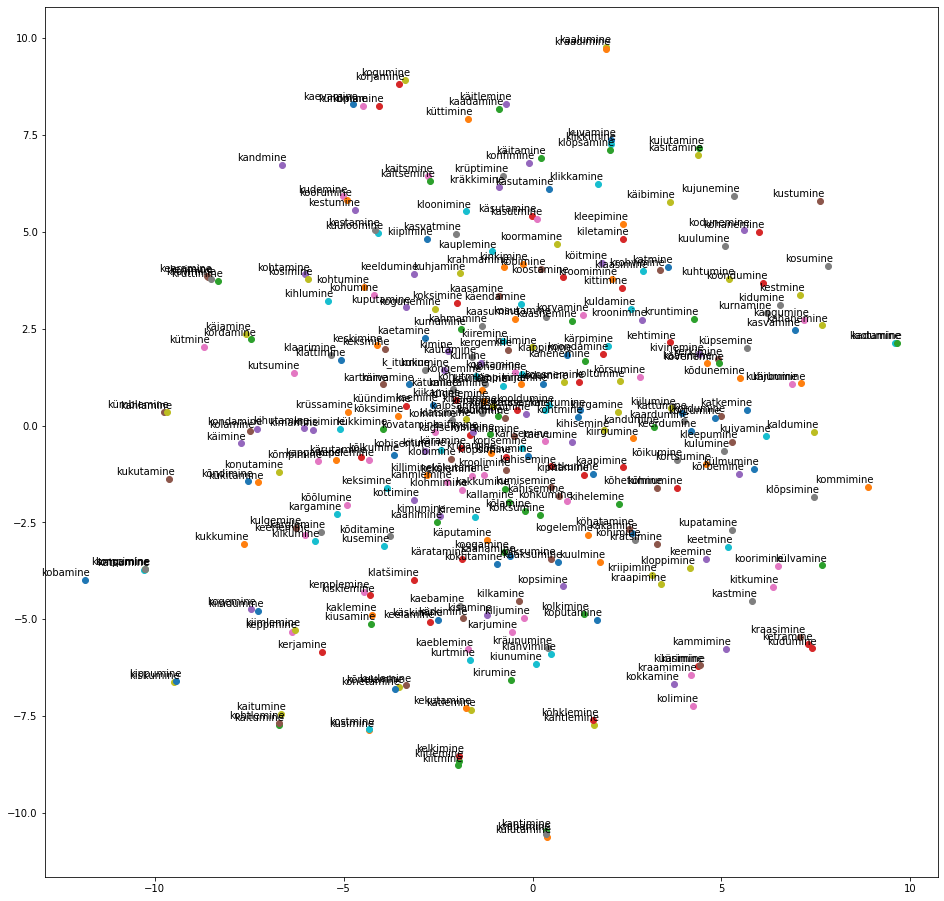

In [166]:
plot(all_values, all_labels)

In [168]:
# proovime väiksema hulga peal
def get_words(model):
    labels = []
    tokens = []

    for word in model.vocab:
        if word.startswith('kasut'):
            analyzed = analyysi(word)
            if analyzed in ['NOUN', 'VERB'] and len(word) < 12:
                tokens.append(model[word])
                labels.append(word)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    return tsne_model.fit_transform(tokens), labels

In [169]:
# ettenteni mudeli peal
all_values, all_labels = get_words(et_wv_model)

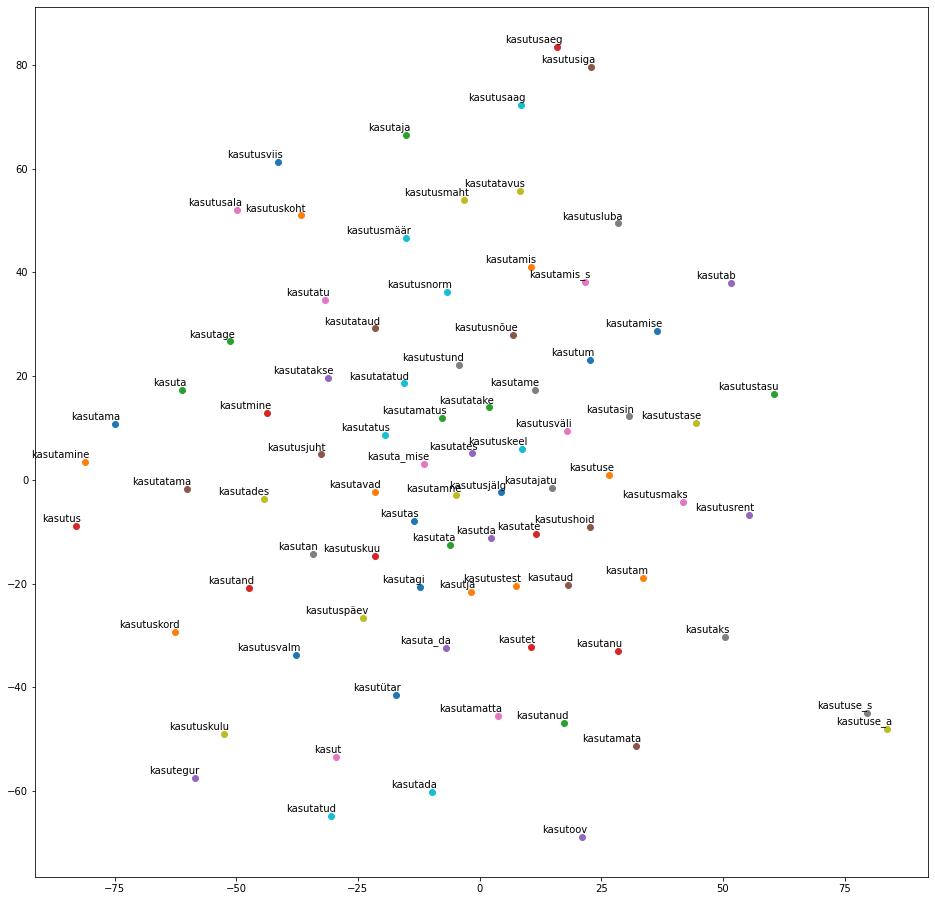

In [170]:
plot(all_values, all_labels)

In [26]:
# vaatame koondkorpuse mudelit NNA- ja TAR-lõpulised nimisõnad
def get_words(model):
    labels = []
    tokens = []

    for word in model.vocab:
            analyzed = analyysi(word)
            if analyzed in ['NOUN'] and (word.endswith('nna') or word.endswith('tar')) and len(word) < 14:
                tokens.append(model[word])
                labels.append(word)
    tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=1000, random_state=23)
    return tsne_model.fit_transform(tokens), labels

In [29]:
all_values, all_labels = get_words(kk_wv_lemma_model)

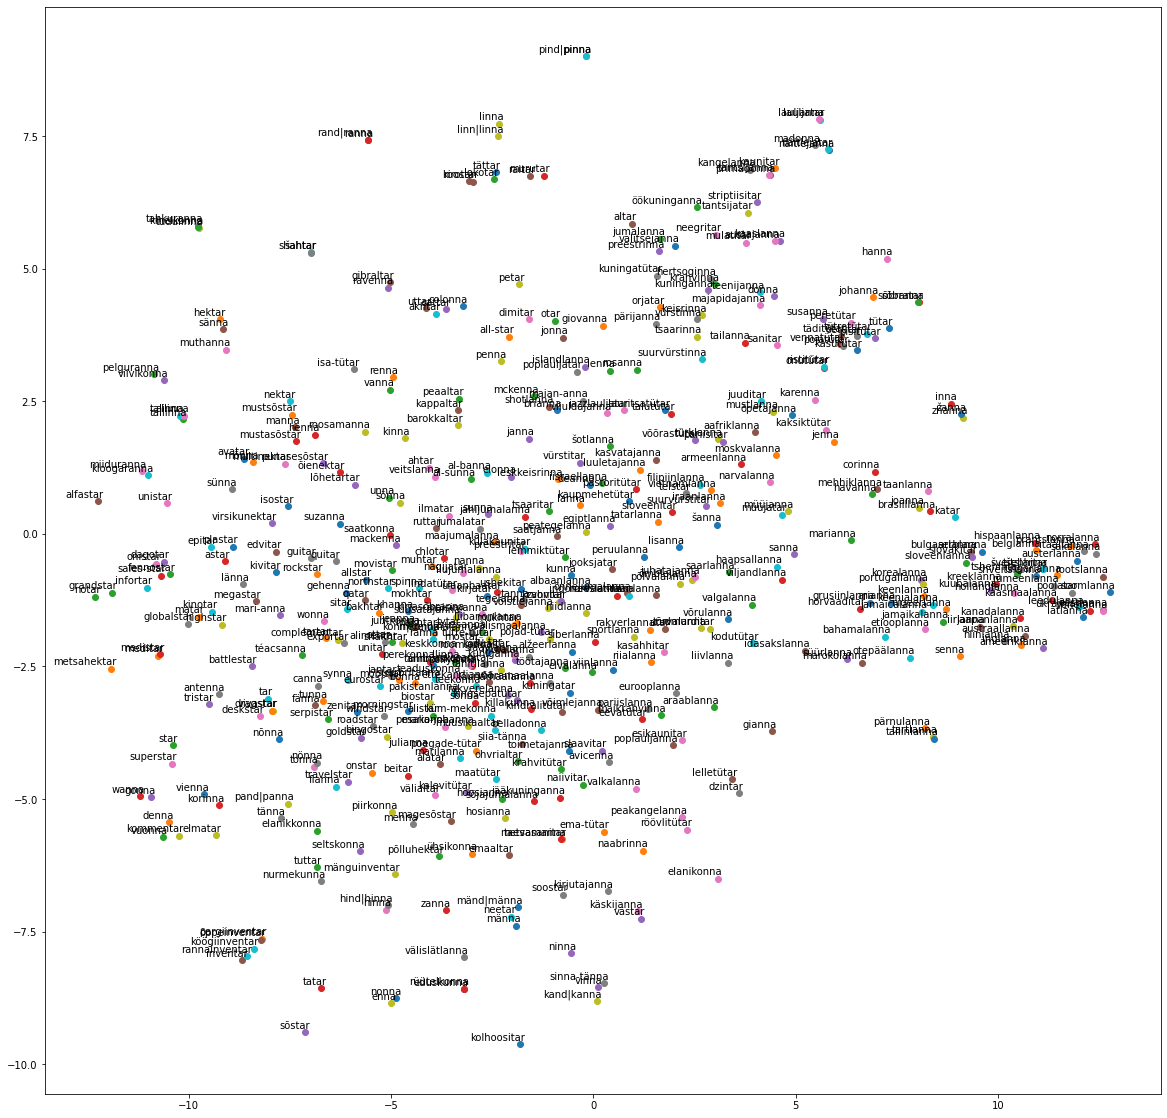

In [32]:
plot(all_values, all_labels)

In [21]:
kk_wv_lemma_model.similarity('kätepesemine', 'käremeelsus')

0.14100885

PROBLEEM: Word2vec genereerib vaid ühe vektoresituse igale sõnale, mis tähendab, et mudel ei arvesta polüseemsete sõnadega ega ole võimeline esitama ühe sõna erinevaid tähendusi

### SenseGram
- [SenseGram](https://github.com/uhh-lt/sensegram) on meetod, mis kasutab sisendina Word2Vec sõnavektoreid ning loob sõna erinevatele tähendustele "eraldiseisvad" vektorid


In [1]:
from sensegram import sensegram

In [2]:
# teekond
sense_vectors_fpath = 'cbow_300_5_10_20/ettenten.txt.sense_vectors'

In [3]:
# laeme erinevate tähenduste vektorid sisse
sv_model = sensegram.SenseGram.load_word2vec_format(sense_vectors_fpath, binary=False)

In [4]:
# vaatame, mis on sõna 'tee' erinevad tähendusrühmad ja nende rühmade TOP 10 sünonüümi
word = 'tee'
for sense_id, prob in sv_model.get_senses(word):
    print('{}\n{}'.format(sense_id, "="*20))
    for rsense_id, sim in sv_model.wv.most_similar(sense_id):
        print("{} {:f}".format(rsense_id, sim))
    print("\n")

tee#1
kitsas_külatee#1 0.841488
teed#3 0.839542
teeäärne_võsa#1 0.837688
teeäärne_kraav#1 0.828941
lai_asfalttee#1 0.828466
suurtee#1 0.826407
väljatagune#1 0.825554
maantee_äärde#1 0.822590
labida#1 0.820709
rannamaantee#1 0.820516


tee#2
mustikavars_tee#1 0.956571
vaarikavars_tee#1 0.955974
köömnetee#1 0.950601
raudrohutee#1 0.948851
pärnaõis_tee#1 0.944634
petersellitee#1 0.941808
vaarikatee#1 0.941416
pärnaõietee#1 0.939267
koirohutee#1 0.937997
punetee#1 0.937006




In [11]:
from sensegram.wsd import WSD
wsd_model = WSD(sv_model, et_wv_model, window=5, method='sim', max_context_words=3)

In [12]:
word = "tee"
contexts = ["Tee on looduslik, aromaatne ja värskendav ning tulenevalt valmistusviisist kas rahustav või ergutav jook, mida saadakse teepõõsa lehtedest. Laiemalt nimetatakse teeks ka teistest taimedest või nende segudest kuumas vees leotamisel saadud jooke.",
           "Rust tuli kuskil poolel teel Moskvasse maha, sest ilmaolude ja lennuki kiiruse jaoks kulus tal tee peal liiga kaua aega.",
           "Paksuks ei tee meid mitte mikrolaineahjud, toidu keetmine või küpsetamine... vaid meie oma võimetus iseennast piirata.",
           ]
ignore_case = True

In [13]:
for context in contexts:
    print(wsd_model.disambiguate(context, word))

('tee#2', [0.019526200257519676, 0.46633675607263547])
('tee#1', [0.38026025424904053, 0.1509635268273021])
('tee#2', [0.03497088632011998, 0.40652559847633857])


In [16]:
word = 'inimene'
for sense_id, prob in sv_model.get_senses(word):
    print('{}\n{}'.format(sense_id, "="*20))
    for rsense_id, sim in sv_model.wv.most_similar(sense_id):
        print("{} {:f}".format(rsense_id, sim))
    print("\n")

inimene#1
äraarvamatult#3 0.858245
indiviid#1 0.853639
lunaatik#3 0.849800
potensiaalselt_ohtlik#2 0.841658
kannatav_olend#3 0.832563
inimolevus#1 0.830649
inimolend#1 0.828250
inimloom#1 0.827817
elusolend#1 0.822581
inimese#1 0.818038


inimene#2
tema#1 0.942509
üksteise#2 0.914654
igaüks#1 0.882975
ise#1 0.872915
oma#1 0.861334
nõnda#1 0.856342
iseenese#1 0.852351
ise#2 0.837308
sina#1 0.830576
peikat#5 0.829657


inimene#3
inmes#1 0.887039
kodanik#2 0.831836
inimete#1 0.821034
eestimaalane#1 0.814769
kaaskodanik#1 0.791852
inimsete#1 0.783357
tavaelanik#1 0.775405
ini_meste#1 0.771547
inimesle#2 0.766658
ühiskonnaliige_heaolu#6 0.765992


inimene#4
tema#2 0.866958
noor#2 0.838445
nooruk#1 0.817195
naisõpetaja#2 0.807524
sampat#7 0.796900
nunn#2 0.795056
teismeline#1 0.794427
mardipere#3 0.788610
hoolealune#3 0.769461
eakaaslane#1 0.766776


inimene#5
liikumispuue_inimene#1 0.958994
liikumispuu_inimene#1 0.954698
nägemispuu_inimene#1 0.936290
nägemispuue_inimene#1 0.933053
puue_inim

In [17]:
word = 'kiiks'
for sense_id, prob in sv_model.get_senses(word):
    print('{}\n{}'.format(sense_id, "="*20))
    for rsense_id, sim in sv_model.wv.most_similar(sense_id):
        print("{} {:f}".format(rsense_id, sim))
    print("\n")

kiiks#1
veidrik#1 0.933328
friik#1 0.914763
friig#1 0.895681
wannabe#1 0.890376
superandekas#4 0.888240
poosetaja#1 0.887902
nohik#1 0.886275
hobusehull#1 0.883091
egotripp#2 0.877058
peenutseja#1 0.877049


kiiks#2
huumoritaju#1 0.914985
huumorisoon#1 0.912508
naljasoon#1 0.912095
absurditaju#1 0.891373
huumorimeel#1 0.889774
kuldlause#2 0.888435
briti_huumor#1 0.887465
muhedus#1 0.879262
vaimukus#1 0.876154
eneseiroonia#1 0.861043


kiiks#3
verbaalne_kõhulahtisus#1 0.877751
mölapidamatus#1 0.849825
veidrus#1 0.847461
suurushullustus#1 0.843060
suurusehullus#1 0.836696
suurusehullustus#1 0.835968
alaväärsus_kompleks#1 0.830624
isiklik_kiiks#2 0.828517
ekstreemsus#3 0.819215
üleolek_demonstreerima#1 0.818790


kiiks#4
jutt#3 0.977194
päris#2 0.945332
vist#1 0.936039
ikka#1 0.934838
jah#1 0.934250
ausalt_ütlema#1 0.927136
muidu#1 0.925828
ju#1 0.923304
tõesti#1 0.921391
tegema#3 0.913802


kiiks#5
tilu#1 0.893455
vigur#1 0.889656
imevigur#1 0.886645
filmijupp#2 0.865581
kiuks#3 0.860394

In [18]:
word = 'nägema'
for sense_id, prob in sv_model.get_senses(word):
    print('{}\n{}'.format(sense_id, "="*20))
    for rsense_id, sim in sv_model.wv.most_similar(sense_id):
        print("{} {:f}".format(rsense_id, sim))
    print("\n")

nägema#1
panema_tähele#1 0.902502
taipama#1 0.898137
märganud#1 0.886483
välja_nägema#2 0.880549
aduma#1 0.873976
teadma#1 0.873578
ette_kujutama#1 0.864511
märkama#1 0.859883
tähele_pannud#1 0.842510
märgatud#2 0.837939


nägema#2
vaadanud#1 0.845027
ette_vaatama#1 0.839869
vaataks#3 0.836053
näinu#2 0.834097
vaatsin#1 0.833042
vaatam#3 0.831061
näidatud#3 0.828362
vaadand#2 0.826366
vahtimine#2 0.823612
läbi_vaatama#1 0.822542


nägema#3
näga#1 0.888800
nägev#2 0.870163
heiastuma#1 0.846764
kangastuma#1 0.818130
vilksatama#1 0.815056
välgatama#1 0.792000
viirastuma#1 0.787784
avanema#1 0.786807
vilgatama#1 0.775775
virvendama#1 0.772616


nägema#4
siiakanti_sattuma#6 0.939894
nägema_ilmavalgus#1 0.937996
ilmavalgus#2 0.936719
täisiga_jõudnu#1 0.906774
ilmavalgus_nägema#2 0.905525
trükivalgus_nägema#1 0.897250
valmima#3 0.896652
välja_ilmuma#2 0.891130
trükivalgus#1 0.888762
nägema_trükivalk#1 0.888575


